In [4]:
#!unxz mnist.out.xz

In [1]:
from model import Model
from collections import namedtuple
import sys
import occlusion
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(1)
np.random.seed(1)

Game = namedtuple('Game', ['env_name', 'input_size', 'output_size', 'wann_file', 'action_select', 'weight_bias'])
game = Game(env_name='MNISTTEST256-v0',
  input_size=256,
  output_size=10,
  wann_file='mnist.out',
  action_select='softmax', # all, soft, hard
  weight_bias=0.0,
)
model = Model(game)
model.make_env()
model.env.seed(1)
model.load_model('mnist256.wann.json')

batch = model.env.reset()
output = model.get_action(batch)

hdm = occlusion.HausdorffDistanceMasks(16, 16)
hdm.generate_masks(1, 1)

loading file mnist256.wann.json


label: 6
prediction 9


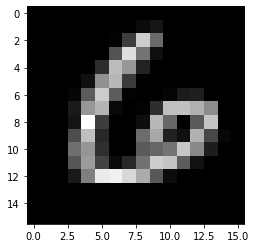

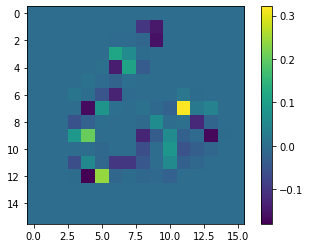

label: 9
prediction 9


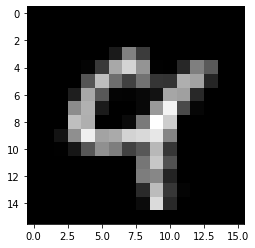

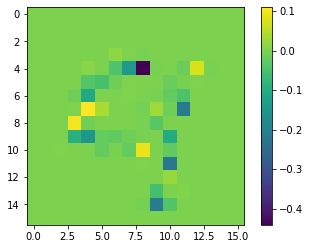

label: 2
prediction 2


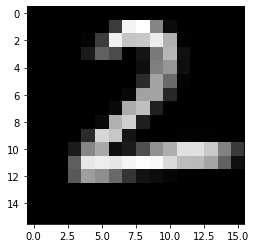

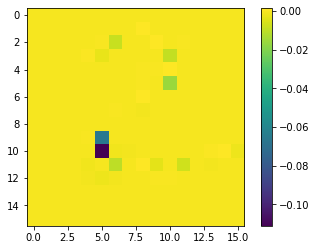

label: 6
prediction 6


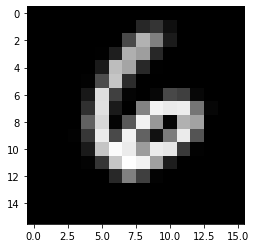

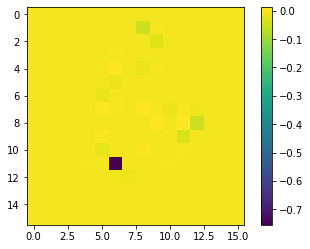

label: 7
prediction 7


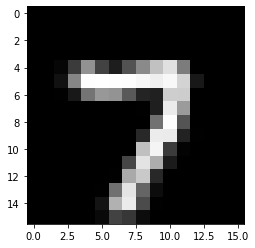

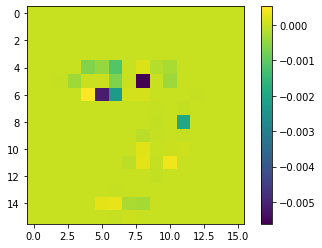

label: 6
prediction 6


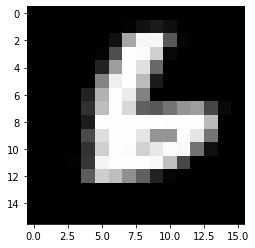

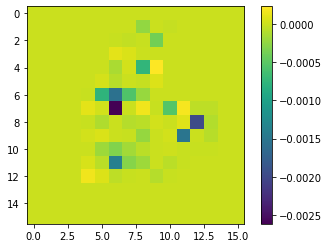

label: 1
prediction 1


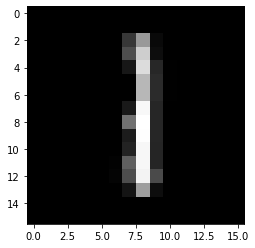

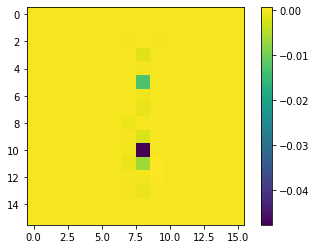

label: 4
prediction 8


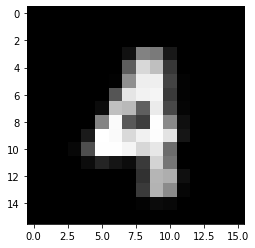

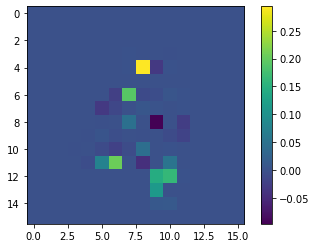

label: 7
prediction 7


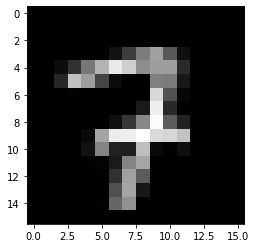

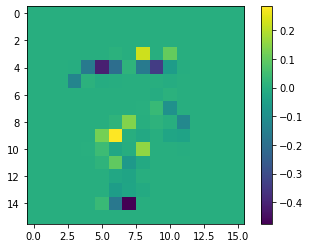

label: 1
prediction 1


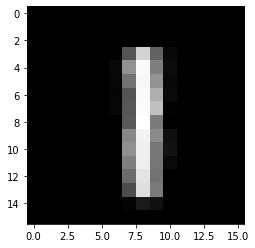

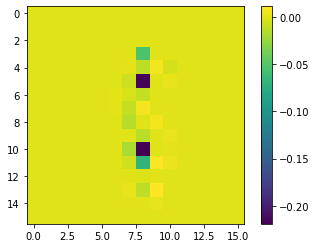

In [3]:
for index in range(10):
    image = batch[index].reshape(16, 16)

    label = model.env.target[model.env.currIndx][index]
    print('label:', label)

    baseline = model.get_action([batch[index]])

    print('prediction', np.argmax(baseline[0]))

    result = hdm.explain(model, image, baseline[0], output_class=label)

    i = image * (255 / image.max())
    i = i.astype(np.uint8)
    plt.imshow(Image.fromarray(i).convert('RGB'))
    plt.show()

    img = plt.imshow(result.distances(occlusion.RAW))
    plt.colorbar(img)
    plt.show()